<a href="https://colab.research.google.com/github/SandaMaster/data-science/blob/master/Kopia_notatnika_ML_workshop_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optymalizacja w machine learning -- model jako funkcja 

Y = f.liniowa(x) f=ax + b y=3 x=2


## Model liniowy i model wielomianowy -- przykaład i optymalizacja

## Modele dostępne w scikit-learn

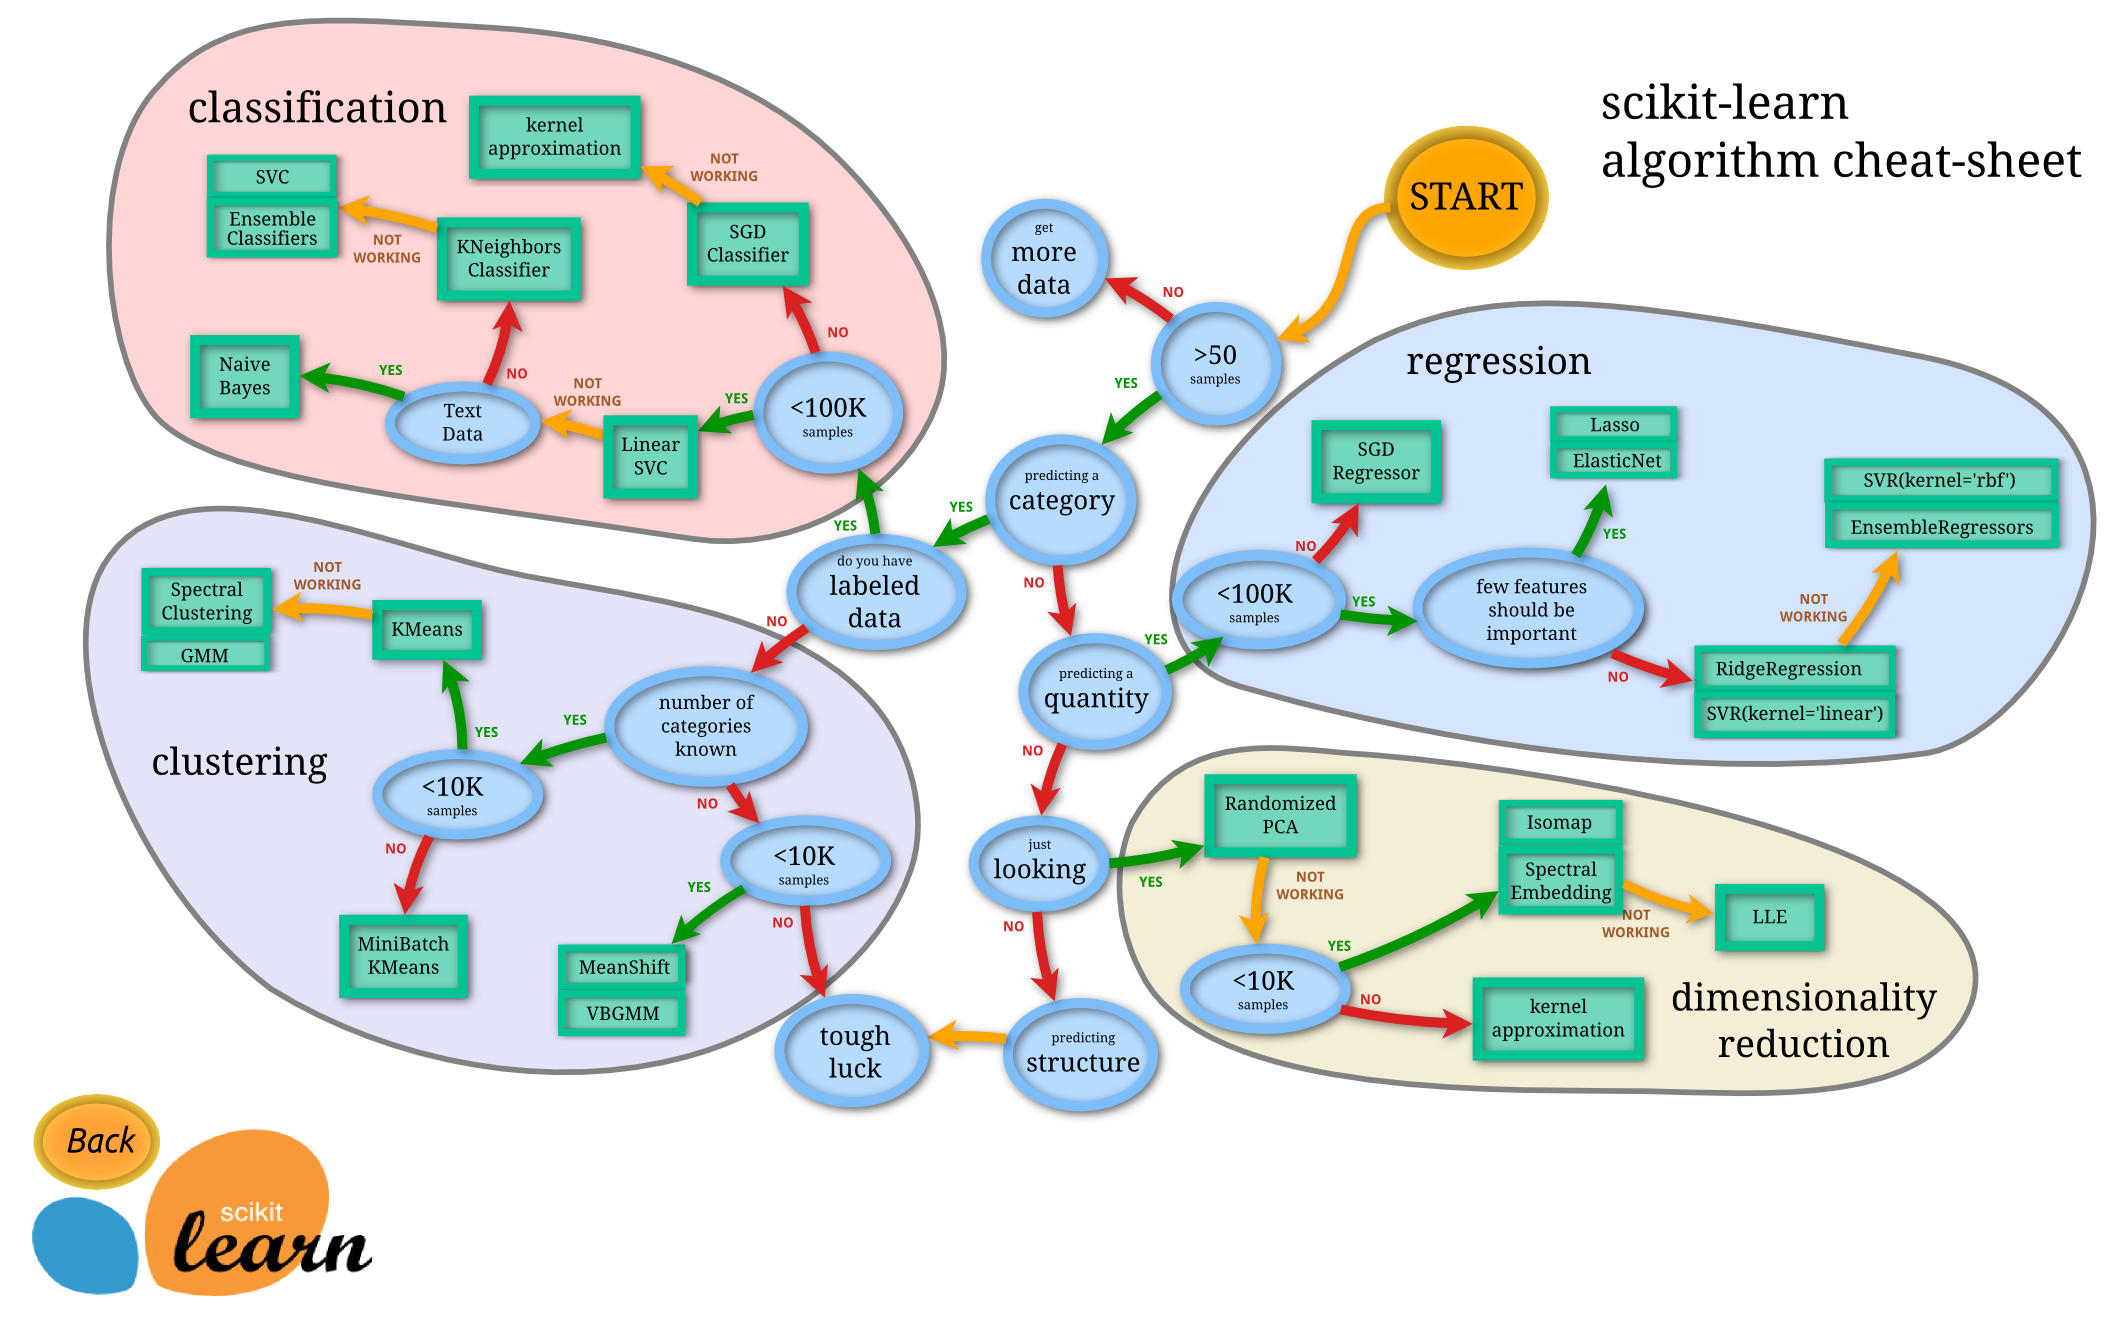

## Przykładowy projekt -- podstawowe kroki


1.   analiza danych
2.   wizualizacja 
3.   feature engineering - przykład 
4.   uczenie modelu 
5.   testowanie modelu 

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

def load_housing_data():
    return pd.read_csv("/gdrive/My Drive/Colab Notebooks/ML-workshop-01/housing.csv")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# dataset taken from [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices)


---



---



In [ ]:
housing = load_housing_data()
housing.rename(columns={"longitude": "Dł. geograficzna", "latitude": "Szer. geograficzna", "housing_median_age": "Mediana wieku mieszkań",
                        "total_rooms": "Całk. liczba pokoi", "total_bedrooms": "Całk. liczba sypialni", "population": "Populacja",
                        "households": "Rodziny", "median_income": "Mediana dochodów", "median_house_value": "Mediana cen mieszkań",
                        "ocean_proximity": "Odległość do oceanu"}, inplace=True)
housing.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dł. geograficzna        20640 non-null  float64
 1   Szer. geograficzna      20640 non-null  float64
 2   Mediana wieku mieszkań  20640 non-null  float64
 3   Całk. liczba pokoi      20640 non-null  float64
 4   Całk. liczba sypialni   20433 non-null  float64
 5   Populacja               20640 non-null  float64
 6   Rodziny                 20640 non-null  float64
 7   Mediana dochodów        20640 non-null  float64
 8   Mediana cen mieszkań    20640 non-null  float64
 9   Odległość do oceanu     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["Odległość do oceanu"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: Odległość do oceanu, dtype: int64

In [ ]:
housing.describe() # zapamiętać tę metodę

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


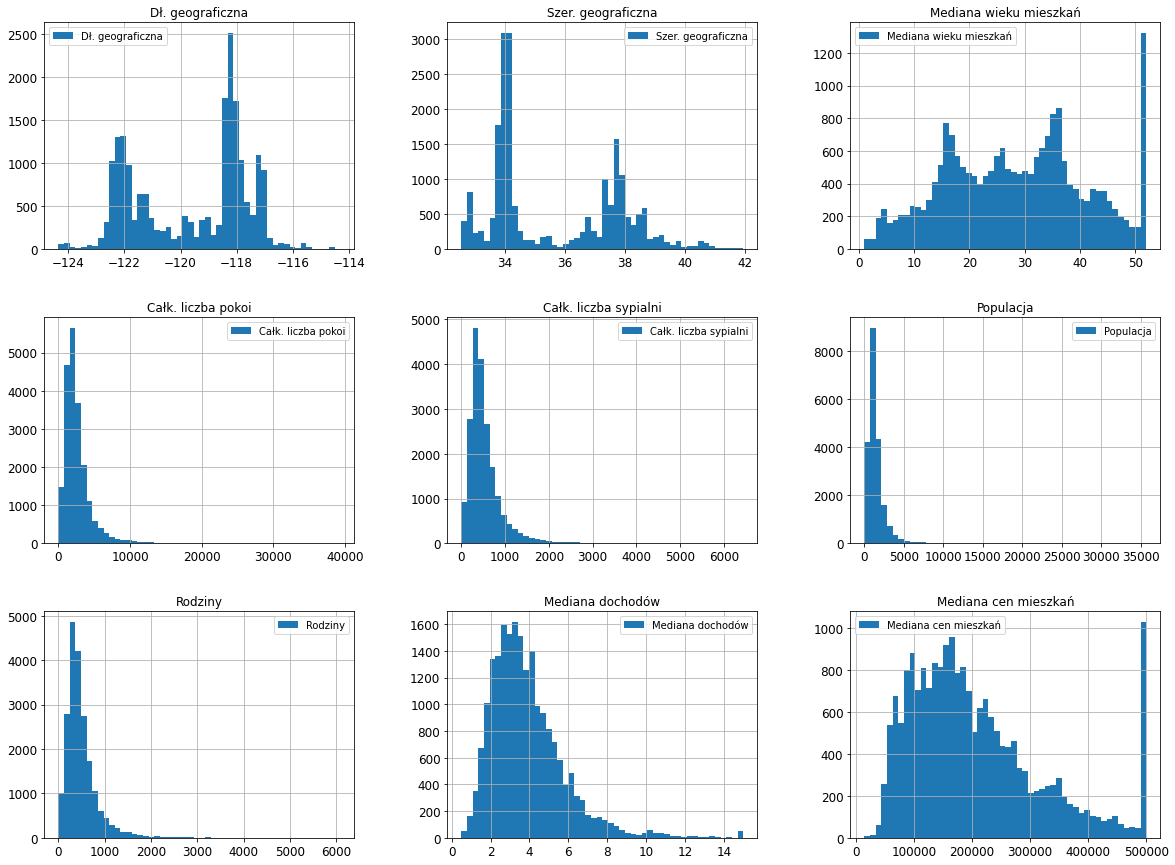

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15), legend=True)
plt.show()

In [ ]:
# w celu zapewnienia powtarzalności wyników przy każdym uruchomieniu notatniku
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


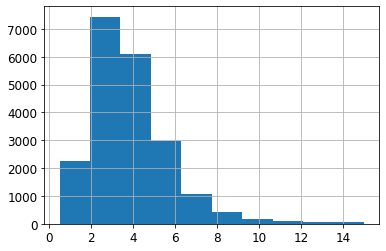

In [ ]:
housing["Mediana dochodów"].hist()

In [ ]:
housing["kat_dochodów"] = pd.cut(housing["Mediana dochodów"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["kat_dochodów"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: kat_dochodów, dtype: int64

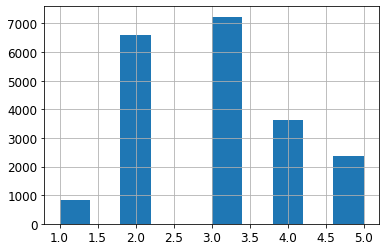

In [ ]:
housing["kat_dochodów"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # zwykły split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # stratified split
for train_index, test_index in split.split(housing, housing["kat_dochodów"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation

In [ ]:
strat_test_set["kat_dochodów"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: kat_dochodów, dtype: float64

In [ ]:
test_set["kat_dochodów"].value_counts() / len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: kat_dochodów, dtype: float64

In [ ]:
def income_cat_proportions(data):
    return data["kat_dochodów"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Łącznie": income_cat_proportions(housing),
    "L. warstwowe": income_cat_proportions(strat_test_set),
    "Losowe": income_cat_proportions(test_set),
}).sort_index()
compare_props["Błąd - losowe (%)"] = 100 * compare_props["Losowe"] / compare_props["Łącznie"] - 100
compare_props["Błąd - l. warstwowe (%)"] = 100 * compare_props["L. warstwowe"] / compare_props["Łącznie"] - 100

In [ ]:
compare_props

,Łącznie,L. warstwowe,Losowe,Błąd - losowe (%),Błąd - l. warstwowe (%)
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("kat_dochodów", axis=1, inplace=True)

In [ ]:
strat_test_set.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


## Wizualizacja danych w celu prezentacji informacji


In [ ]:
housing = strat_train_set.copy() # analizujemy dane treningowe

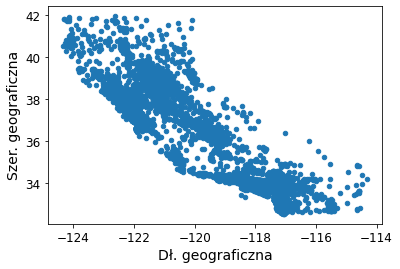

In [ ]:
housing.plot(kind="scatter", x="Dł. geograficzna", y="Szer. geograficzna")

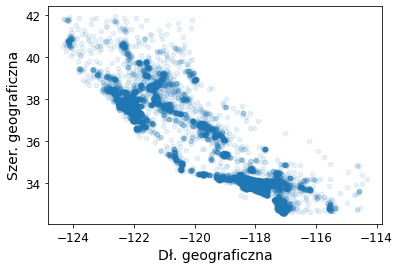

In [ ]:
housing.plot(kind="scatter", x="Dł. geograficzna", y="Szer. geograficzna", alpha=0.1)

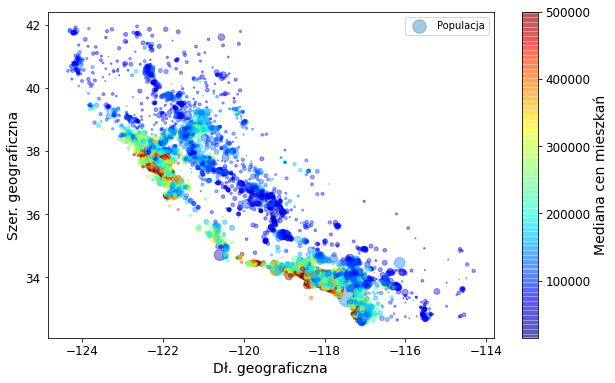

In [ ]:
housing.plot(kind="scatter", x="Dł. geograficzna", y="Szer. geograficzna", alpha=0.4,
    s=housing["Populacja"]/100, label="Populacja", figsize=(10,6),
    c="Mediana cen mieszkań", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix["Mediana cen mieszkań"].sort_values(ascending=False)

Mediana cen mieszkań      1.000000
Mediana dochodów          0.687151
Całk. liczba pokoi        0.135140
Mediana wieku mieszkań    0.114146
Rodziny                   0.064590
Całk. liczba sypialni     0.047781
Populacja                -0.026882
Dł. geograficzna         -0.047466
Szer. geograficzna       -0.142673
Name: Mediana cen mieszkań, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3348d1ad0>,
      dtype=object)

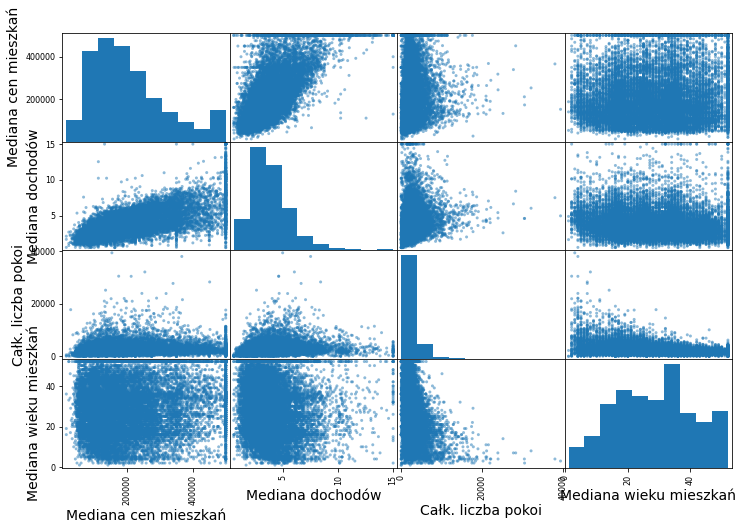

In [ ]:

from pandas.plotting import scatter_matrix

attributes = ["Mediana cen mieszkań", "Mediana dochodów", "Całk. liczba pokoi",
              "Mediana wieku mieszkań"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

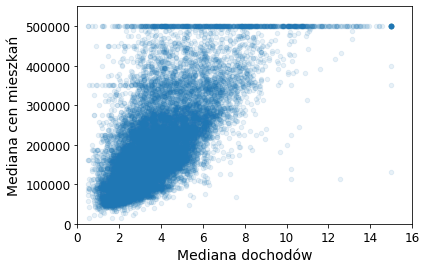

In [ ]:
housing.plot(kind="scatter", x="Mediana dochodów", y="Mediana cen mieszkań",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## feature engineering


In [ ]:
housing["Pokoje_na_rodzinę"] = housing["Całk. liczba pokoi"]/housing["Rodziny"]
housing["Sypialnie_na_pokoje"] = housing["Całk. liczba sypialni"]/housing["Całk. liczba pokoi"]
housing["Populacja_na_rodzinę"]=housing["Populacja"]/housing["Rodziny"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["Mediana cen mieszkań"].sort_values(ascending=False)

Mediana cen mieszkań      1.000000
Mediana dochodów          0.687151
Pokoje_na_rodzinę         0.146255
Całk. liczba pokoi        0.135140
Mediana wieku mieszkań    0.114146
Rodziny                   0.064590
Całk. liczba sypialni     0.047781
Populacja_na_rodzinę     -0.021991
Populacja                -0.026882
Dł. geograficzna         -0.047466
Szer. geograficzna       -0.142673
Sypialnie_na_pokoje      -0.259952
Name: Mediana cen mieszkań, dtype: float64

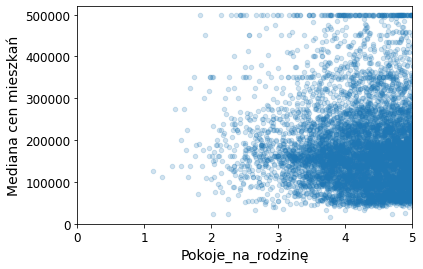

In [ ]:
housing.plot(kind="scatter", x="Pokoje_na_rodzinę", y="Mediana cen mieszkań",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [ ]:
housing.describe() # bardzo przydatne, warto zapamiętać

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Pokoje_na_rodzinę,Sypialnie_na_pokoje,Populacja_na_rodzinę
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Przygotowanie danych pod algorytmy uczenia maszynowego

In [ ]:
housing_labels = strat_train_set["Mediana cen mieszkań"].copy()
housing = strat_train_set.drop("Mediana cen mieszkań", axis=1) # usuwa etykiety w zbiorze uczącym

In [ ]:
housing_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: Mediana cen mieszkań, dtype: float64

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
sample_incomplete_rows.dropna(subset=["Całk. liczba sypialni"])    # pierwsza możliwość -- prosta ale można lepiej

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu


In [ ]:
sample_incomplete_rows

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
#Usuwamy atrybut tekstowy, ponieważ mediana może być obliczana wyłącznie wobec atrybutów numerycznych:
housing_num = housing.drop('Odległość do oceanu', axis=1)
# ewentualnie: housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values]

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## Przetwórzmy wstępnie wartości cechy kategorycznej Odległość do oceanu:

In [ ]:
housing_cat = housing[["Odległość do oceanu"]]
housing_cat.head(10)

,Odległość do oceanu
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# indeks kolumny
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["Pokoje_na_rodzinę", "Populacja_na_rodzinę"],
    index=housing.index)
housing_extra_attribs.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu,Pokoje_na_rodzinę,Populacja_na_rodzinę
12655,-121.46,38.52,29,3873,797,2237,706,2.1736,INLAND,5.48584,3.16856
15502,-117.23,33.09,7,5320,855,2015,768,6.3373,NEAR OCEAN,6.92708,2.6237
2908,-119.04,35.37,44,1618,310,667,300,2.875,INLAND,5.39333,2.22333
14053,-117.13,32.75,24,1877,519,898,483,2.2264,NEAR OCEAN,3.88613,1.85921
20496,-118.7,34.28,27,3536,646,1837,580,4.4964,<1H OCEAN,6.09655,3.16724


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["Odległość do oceanu"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 16)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# Przetestujmy pełen potok na kilku przykładach uczących
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prognozy:", lin_reg.predict(some_data_prepared))

Prognozy: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [ ]:
print("Etykiety:", list(some_labels))

Etykiety: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915802

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
housing_test_labels = strat_test_set["Mediana cen mieszkań"].copy()
housing_test = strat_test_set.drop("Mediana cen mieszkań", axis=1) # usuwa etykiety w zbiorze uczącym

In [ ]:
housing_test_prepared = full_pipeline.fit_transform(housing_test)

In [ ]:
housing_test_prepared.shape

(4128, 16)

In [ ]:
housing_predictions = lin_reg.predict(housing_test_prepared)
lin_mse = mean_squared_error(housing_test_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse



66975.77789893826

In [ ]:
housing_predictions = tree_reg.predict(housing_test_prepared)
tree_mse = mean_squared_error(housing_test_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

109896.41919353555